<a href="https://colab.research.google.com/github/RiH-137/CNN_imgClassification/blob/main/CNN_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOGS-vs-CATS datasets

2 classes--> dogs and cats

### Downloading dataset from kaggle

In [13]:
!pip install -q kaggle

In [14]:
#connecting to kaggle server

!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!cp kaggle.json ~/.kaggle/

In [16]:
!chmod 600 /content/kaggle.json

In [17]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [19]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [20]:
pip install tensorflow

In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [22]:
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense,MaxPooling2D,Flatten

In [29]:
#internally it is using generator concept which is there in python---> to use memory in efficient manner

train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    batch_size=32,
    image_size=(256,256),         #since we have different image of different sizes so we need to fix the size so we generalize it.
    labels="inferred",
    label_mode="int"              #assisgning cat==0 and dog==1

)


#test_db
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [30]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
for i in train_ds:
  print (i)

Streaming output truncated to the last 5000 lines.
         [2.05859375e+02, 2.04011719e+02, 2.14554688e+02],
         [2.07000000e+02, 2.05152344e+02, 2.15695312e+02],
         ...,
         [2.19031799e+02, 2.04246368e+02, 2.19476837e+02],
         [2.13136719e+02, 2.05445312e+02, 2.17847656e+02],
         [2.12396820e+02, 2.05828125e+02, 2.17847656e+02]],

        ...,

        [[1.46357086e+02, 1.53357086e+02, 1.59357086e+02],
         [1.48476562e+02, 1.55476562e+02, 1.61476562e+02],
         [1.42065857e+02, 1.49065857e+02, 1.57065857e+02],
         ...,
         [1.75601288e+02, 1.66601288e+02, 1.85601288e+02],
         [1.77907196e+02, 1.70907196e+02, 1.88907196e+02],
         [1.76019531e+02, 1.69019531e+02, 1.87019531e+02]],

        [[1.31533997e+02, 1.38533997e+02, 1.44533997e+02],
         [1.29031464e+02, 1.36031464e+02, 1.42031464e+02],
         [1.27198029e+02, 1.34198029e+02, 1.42198029e+02],
         ...,
         [1.74457031e+02, 1.65457031e+02, 1.84457031e+02],
    

In [36]:
#if we want fast process-->unit scalling

def process(image,label):
  tf.cast(image/255, tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [38]:
model=Sequential()

In [39]:
#input layer

#first convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#second convolution network
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))      #since 32 input therefore there must be 32 feature map
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#third convolution layer
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#model flattening
model.add(Flatten())

#creating NN
#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128, activation='relu'))
#adding first hidden layer with 64 neurons and relu activation
model.add(Dense(64, activation='relu'))

#output layer
#here we have 1 output layer since it is binary classification
model.add(Dense(1, activation='sigmoid'))

In [40]:
model

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Train the model
history=model.fit(train_ds, epochs=2, validation_data=validation_ds)
history

Epoch 1/2
625/625 [==============================] - 78s 123ms/step - loss: 0.5860 - accuracy: 0.6856 - val_loss: 0.6701 - val_accuracy: 0.6298
Epoch 2/2
625/625 [==============================] - 57s 91ms/step - loss: 0.4652 - accuracy: 0.7728 - val_loss: 0.7774 - val_accuracy: 0.6170


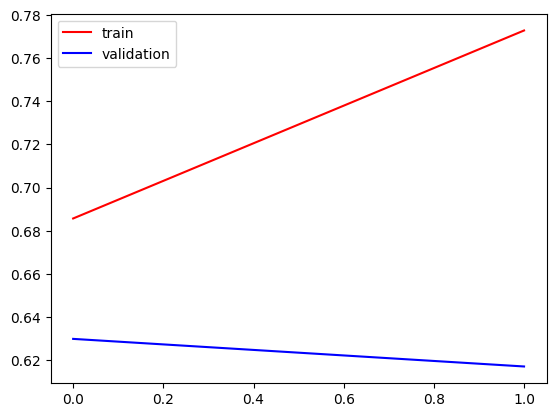

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

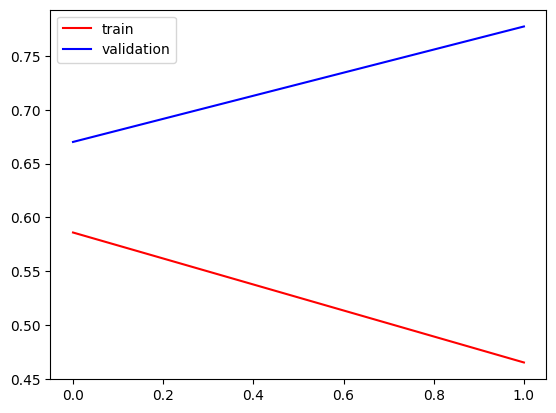

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [57]:
#in order to test our model we need to download some image from the google and stored in testing_img

In [62]:
#with MATPLOTLIB
import matplotlib.pyplot as plt


In [63]:
test_img=plt.imread(r'/content/testing_img/dog-skateboarding.webp')

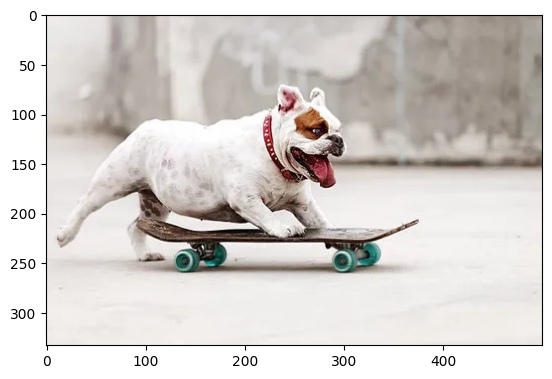

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(333, 500, 3)

we need to resize the image...

In [58]:
import cv2

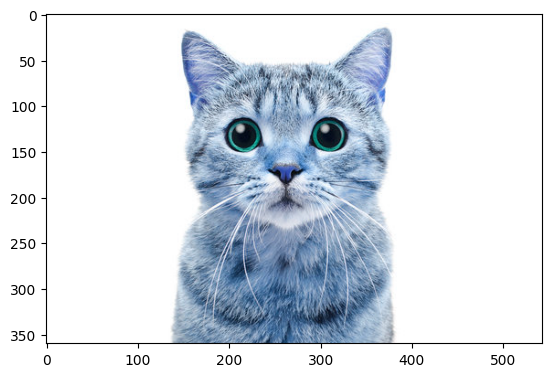

In [79]:
test_img=cv2.imread(r'/content/testing_img/cat_img.jpg')
plt.imshow(test_img)

In [80]:
test_img=cv2.resize(test_img,(256,256))

In [81]:
test_input=test_img.reshape((1,256,256,3))

In [82]:
pred=model.predict(test_input)
pred

1/1 [==============================] - 0s 19ms/step


array([[0.545247]], dtype=float32)

model retur==> 0 means its a cat.

In [78]:
if pred==0:
  print("cat")
else:
  print("dog")

dog


#here are some error and hence we need to use
1. drop out
2. normalizarions
3. batch normalization etc. to make our model good.